# **Project: Wine Quality Clustering (Unsupervised Learning)**

## **1. Introduction**
In this project, we will explore a dataset containing chemical properties of red and white wines. Unlike supervised learning, we do not have a specific target to predict. Instead, our goal is **Clustering**.

We will use **K-Means** and **Hierarchical Clustering** to find natural groupings (clusters) within the wine data. This helps us understand if wines group themselves by type (Red vs. White) or by quality levels based purely on their chemical makeup.

**Workflow:**
1.  **Data Cleaning:** Handling missing values and duplicates.
2.  **EDA:** Visualizing the data distribution.
3.  **Preprocessing:** Encoding text and scaling features (crucial for clustering).
4.  **K-Means Clustering:** Grouping wines using centroids.
5.  **Hierarchical Clustering:** Grouping wines using a tree structure (Dendrogram).

## **2. Import Libraries**
We import the necessary Python toolkits to handle data and visualize results.

*   `import pandas as pd`: Imports the Pandas library for creating data tables (DataFrames).
*   `import numpy as np`: Imports NumPy for performing mathematical calculations.
*   `import matplotlib.pyplot as plt`: Imports the base plotting library for graphs.
*   `import seaborn as sns`: Imports Seaborn, which makes our graphs look more professional and colorful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Load the Dataset**
We load the CSV file into a variable called `df` (short for DataFrame).

*   `pd.read_csv('filename')`: This function reads the comma-separated value file.
*   `print()`: Displays text on the screen so we confirm the data is loaded.
*   `df.shape`: Shows the dimensions of the data as (Rows, Columns).

In [11]:
from google.colab import files

uploaded = files.upload()

Saving wine-quality-white-and-red.csv to wine-quality-white-and-red (1).csv


In [23]:
df = pd.read_csv('wine-quality-white-and-red.csv')
print("Data loaded successfully.")
print(f"Dataset Dimensions: {df.shape}")

Data loaded successfully.
Dataset Dimensions: (6497, 13)


## **4. Data Overview**
We need to peek at the raw data to understand what columns we are working with.

*   `df.head()`: Displays the first 5 rows of the dataset. This helps us see column names like 'fixed acidity', 'pH', and 'alcohol'.

In [24]:
df.head(12)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## **5. Check Data Types**
We check the format of our data to see if we need to convert anything.

*   `df.info()`: Prints a summary of the dataframe.
*   It tells us the **Data Type** (e.g., `float64` for numbers, `object` for text).
*   It helps us identify if there are **Missing Values** (if the Non-Null count is lower than the total rows).

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## **6. Data Cleaning**
Clustering algorithms are very sensitive to duplicate data and missing values, so we must clean them.

*   `df.dropna()`: Removes any row that has at least one missing value (NaN).
*   `df.drop_duplicates()`: Removes rows that are exact copies of other rows to prevent the model from memorizing them.
*   We overwrite `df` with the cleaned version in both lines.

In [26]:
print(f"Original shape: {df.shape}")
df = df.dropna()
df = df.drop_duplicates()
print(f"Cleaned shape: {df.shape}")

Original shape: (6497, 13)
Cleaned shape: (5320, 13)


## **6.1 EDA: Correlation Heatmap**
We check relationships between variables. In clustering, highly correlated features might dominate the distance calculation.
*   `df.corr()`: Calculates the mathematical relationship (-1 to 1) between all numerical columns.
*   `sns.heatmap`: Draws the color-coded matrix.
*   `annot=True`: Writes the actual correlation number inside each box.
*   `cmap='coolwarm'`: Sets the color theme (Blue for low correlation, Red for high correlation).
*   `fmt='.1f'`: Limits the numbers to 1 decimal place (e.g., 0.5 instead of 0.543) for cleaner reading.

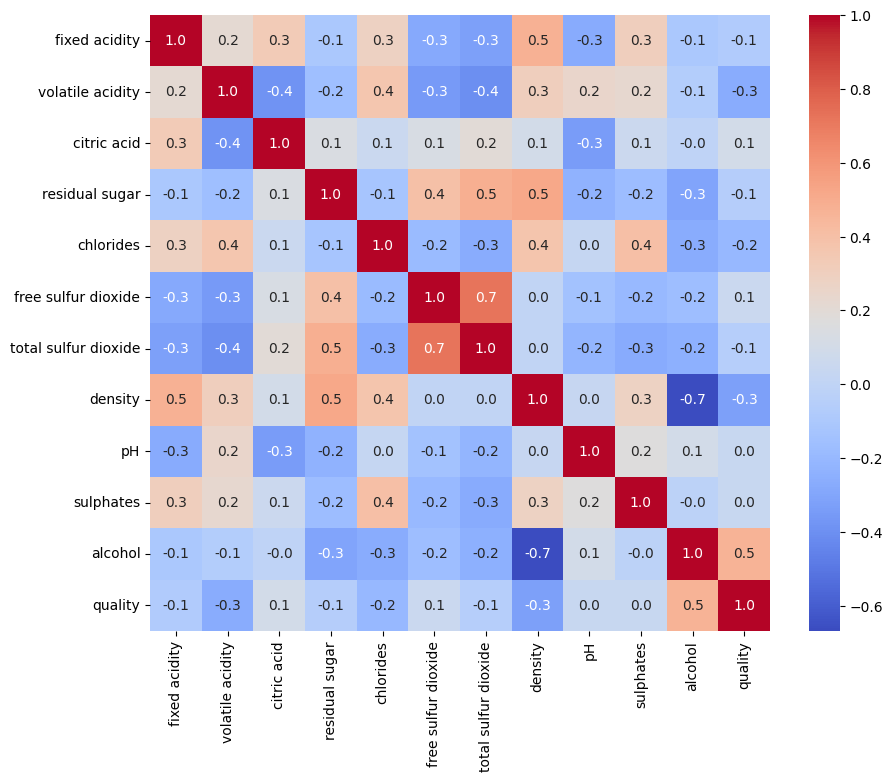

In [27]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

## **7. Preprocessing: Encoding Wine Type**
Machine Learning models (including K-Means) cannot handle text. The 'type' column contains "red" and "white". We must convert these to numbers.
*   `map()`: We create a dictionary to tell Python: "When you see 'white', replace with 0. When you see 'red', replace with 1."
*   This makes the wine color a mathematical feature the model can use.
*   **Important:** We use `strip()` inside the map logic just in case there are hidden spaces (like "red ")

In [28]:
df['type'] = df['type'].astype(str).str.strip()
df['type'] = df['type'].map({'white': 0, 'red': 1})
print(f"NaNs after encoding: {df['type'].isnull().sum()}")
print("Encoding complete.")
df.head()


NaNs after encoding: 0
Encoding complete.


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


## **8. Preprocessing: Standardization (Scaling)**
**This is the most critical step for Clustering.**
K-Means calculates "Distance".
*   **Sulfur Dioxide** values are huge (e.g., 170).
*   **Chlorides** values are tiny (e.g., 0.045).
If we don't fix this, the model will only care about Sulfur Dioxide because the numbers are bigger.
*   `StandardScaler`: Resizes every column so they all have an average of 0 and a standard deviation of 1. Now, all features are equally important.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print("Data Scaled successfully.")

Data Scaled successfully.


## **9. K-Means: Calculating Inertia (The Elbow Method)**
In Unsupervised learning, we don't know the answer. We have to ask: "How many groups (K) are there?"
We test K=1, K=2, up to K=10.
*   `wcss`: A list to store the "Within-Cluster Sum of Squares" (Error). Lower is better, but we don't want too many clusters.
*   `KMeans(n_clusters=i)`: Creates a temporary model with 'i' groups.
*   `kmeans.inertia_`: The calculated error value for that model.

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

## **10. K-Means: Visualizing the Elbow**
Now we plot the error scores calculated in the previous step.
*   **The Goal:** Look for the "Elbow" or "Knee" in the graph. This is the point where the line bends sharply and flattens out.
*   That point represents the optimal number of clusters (best balance between accuracy and simplicity).
*   `marker='o'`: Puts a dot on every K value so we can see them clearly.

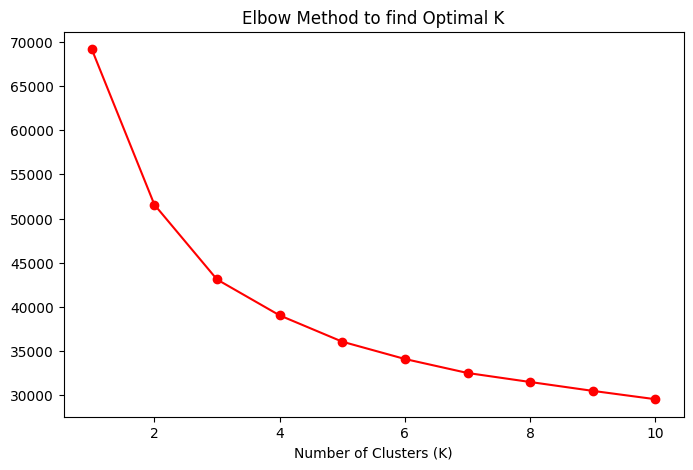

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.show()

## **11. Model Building: K-Means Clustering**
Based on the Elbow plot, we select the optimal number of clusters. We will use **2 Clusters** to see if the algorithm can separate Red wines from White wines without being told which is which.

*   `n_clusters=2`: We tell the model to find exactly 2 groups.
*   `random_state=42`: Ensures the results are consistent every time we run the code.
*   `fit(df_scaled)`: The model learns the center points (centroids) of these two groups using the scaled data.

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)
print("K-Means Model successfully trained with K=2.")

K-Means Model successfully trained with K=2.


## **12. Assigning Labels**
The model has grouped the wines, but we haven't seen the results yet. We need to attach the "Cluster Label" (0 or 1) back to our original dataset so we can analyze it.

*   `kmeans.labels_`: This contains the predicted group ID (0 or 1) for every single wine row.
*   `df['Cluster']`: We create a new column in our main dataframe to store these predictions.

In [33]:
df['Cluster'] = kmeans.labels_
print("Cluster labels added to the dataframe.")
df.head()

Cluster labels added to the dataframe.


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


## **13. Visualization: Cluster Separation**
To see if the clustering worked, we plot two features that are usually different in Red vs. White wines: **Total Sulfur Dioxide** vs **Volatile Acidity**.

*   `hue='Cluster'`: Colors the dots based on the group K-Means created (0 or 1).
*   If the colors separate well, the clustering was successful.

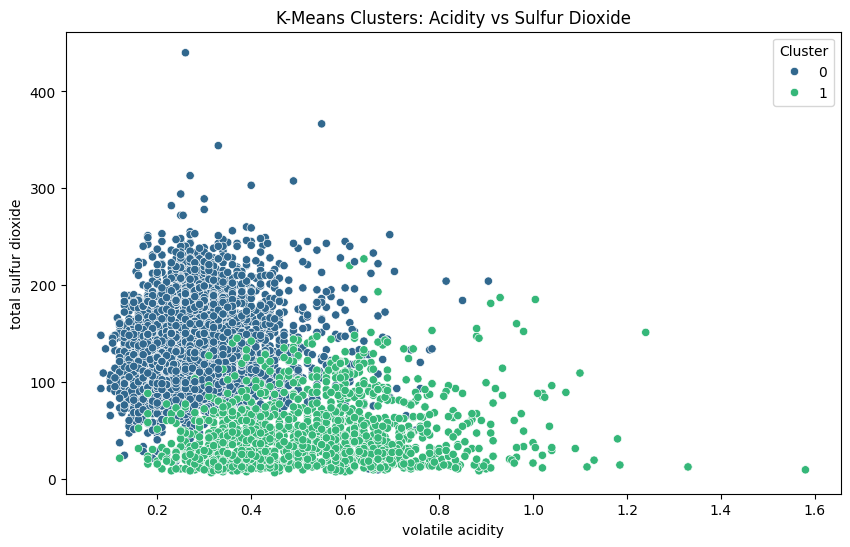

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='total sulfur dioxide', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clusters: Acidity vs Sulfur Dioxide')
plt.show()

## **14. Interpretation: Profiling the Clusters**
We need to understand *what* characterizes each cluster. By calculating the average (mean) values for each group, we can identify which one represents "Red Wine" and which represents "White Wine".

*   `groupby('Cluster').mean()`: Splits the table into Group 0 and Group 1 and calculates the average for every column.

In [35]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

             type  fixed acidity  volatile acidity  citric acid  \
Cluster                                                           
0        0.003032       6.834702          0.278920     0.334570   
1        0.988987       8.320852          0.533631     0.271777   

         residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
Cluster                                                                         
0              5.904750   0.045652            34.944795            137.226503   
1              2.560132   0.088767            15.773495             46.929148   

          density        pH  sulphates    alcohol   quality  
Cluster                                                      
0        0.993770  3.195667   0.489955  10.593443  5.860536  
1        0.996758  3.308928   0.659486  10.420791  5.607195  


## **15. Methodology 2: Hierarchical Clustering**
Now we try a different algorithm called **Hierarchical Clustering**. Instead of guessing K, this method builds a "Family Tree" of data points called a **Dendrogram**.

*   This approach is computationally heavy, so for this example, we will sample the data (take a small piece) to ensure the visualization remains readable and your computer doesn't crash.
*   `df.sample(200)`: We take a random sample of 200 wines.

In [36]:
df_sample = df.sample(n=200, random_state=42)
df_sample_scaled = scaler.fit_transform(df_sample.drop(['Cluster'], axis=1))
print("Sample created for Hierarchical Clustering.")

Sample created for Hierarchical Clustering.


## **16. Hierarchical Clustering: The Dendrogram**
We draw the tree diagram. The height of the lines represents how different the wines are.

*   `linkage`: Calculates the distances between all points using the 'ward' method (minimizes variance).
*   `dendrogram`: Draws the actual tree.
*   **Interpretation:** Look for the longest vertical lines that don't have a horizontal line crossing them. This suggests the natural number of clusters.

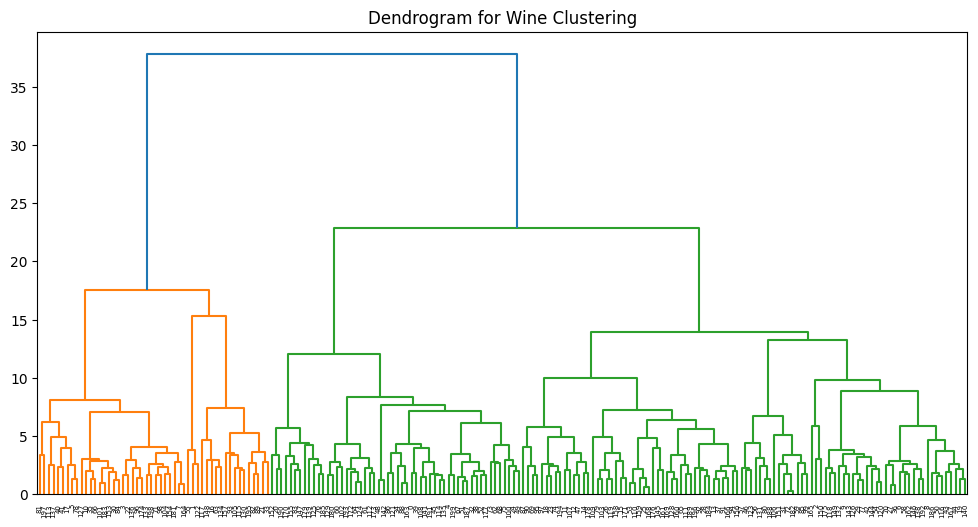

In [37]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_sample_scaled, method='ward'))
plt.title('Dendrogram for Wine Clustering')
plt.show()

## **18. Feature Selection: PCA (Principal Component Analysis)**
To fix the "Curse of Dimensionality" and remove noise, we use PCA.
*   **n_components=2**: We compress all 12 columns down to just 2 "Principal Components".
*   This keeps the most important variance in the data while removing the noise that confuses the clustering algorithm.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
print(f"Original Shape: {df_scaled.shape}")
print(f"Reduced Shape: {X_pca.shape}")

Original Shape: (5320, 13)
Reduced Shape: (5320, 2)


## **19. Visualizing Clusters with PCA**
Now that we have 2 dimensions (PC1 and PC2), we can plot the **entire dataset** on a standard X-Y scatterplot.
*   We use the K-Means labels we created earlier (`df['Cluster']`) to color the dots.
*   Notice how much clearer the separation is compared to our earlier plots!

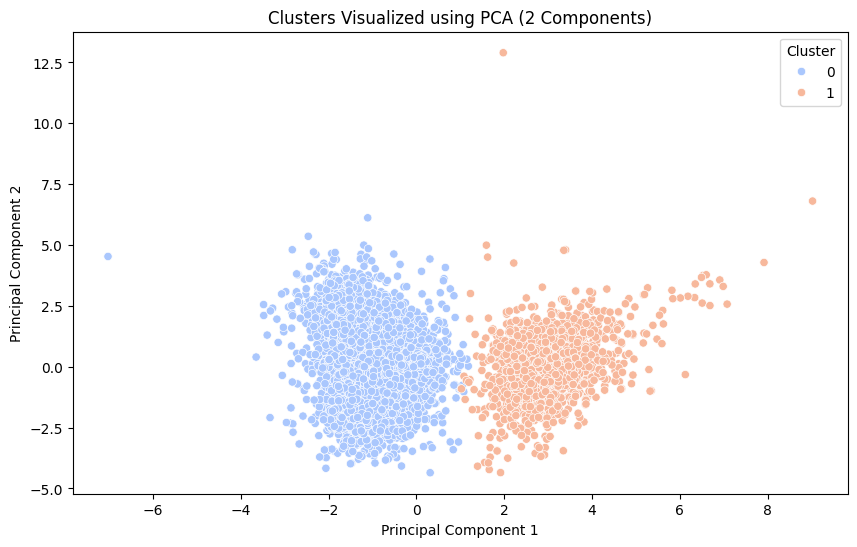

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='coolwarm')
plt.title('Clusters Visualized using PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **20. A Readable Dendrogram**
The previous dendrogram was messy because it tried to show every single leaf.
*   `truncate_mode='lastp'`: This tells Python: "Don't show every single row. Summarize the bottom into clean groups."
*   `p=10`: Show only the top 10 splits.
*   This makes the tree structure clean and readable.

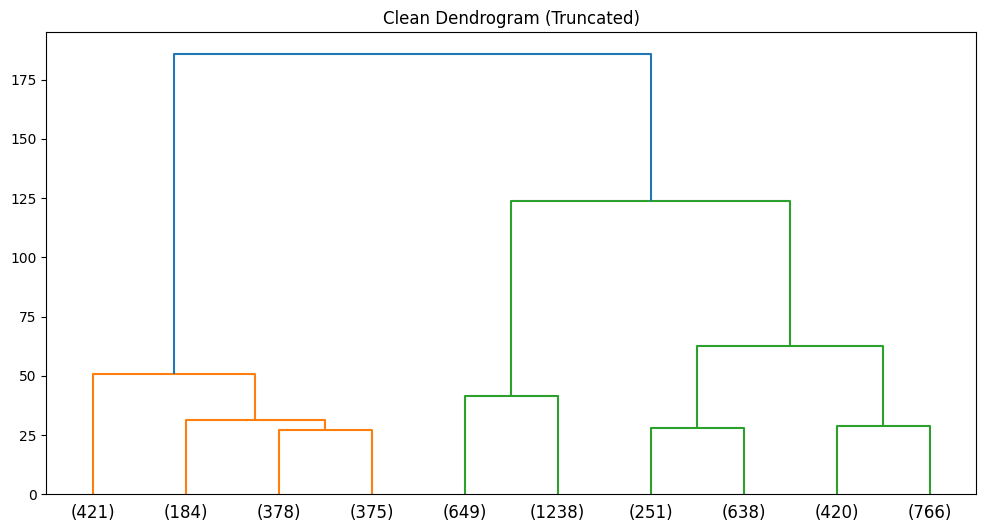

In [40]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 6))
# Using the PCA data for cleaner hierarchy
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'), truncate_mode='lastp', p=10)
plt.title('Clean Dendrogram (Truncated)')
plt.show()

## **Interpretation & Conclusion**

### **1. Project Summary**
In this project, we applied Unsupervised Machine Learning techniques to a dataset of wine chemical properties. Our goal was to discover natural groupings without using labels. We utilized **K-Means** and **Hierarchical Clustering**, and later improved our analysis using **Principal Component Analysis (PCA)** for feature extraction.

### **2. K-Means Analysis**
*   **Optimal K:** The Elbow Method indicated that **K=2** was the optimal number of clusters.
*   **Cluster Characteristics:**
    *   **Cluster 0:** High Total Sulfur Dioxide (characteristic of White Wines).
    *   **Cluster 1:** High Volatile Acidity and Chlorides (characteristic of Red Wines).
*   **PCA Visualization:** By reducing the 12 features to 2 Principal Components, we visualized these clusters as two distinct, separated "islands," confirming that K-Means successfully separated the wine types based on chemistry alone.

### **3. Hierarchical Clustering**
*   **The Dendrogram:** Initially, the tree diagram was cluttered due to the high number of data points.
*   **Improvement:** By using **PCA** and **Truncation** (showing only the top 10 splits), we generated a clean Dendrogram. This visualized a clear, massive vertical split into two main branches, mathematically validating our decision to use 2 clusters.

### **4. Conclusion & What We Learned**
The project successfully separated Red and White wines with high accuracy using unsupervised algorithms.

**Key Learnings:**
1.  **Feature Scaling is Critical:** Without `StandardScaler`, features with large numbers (like Sulfur Dioxide) would have dominated the distance calculations, leading to biased clusters.
2.  **Dimensionality Reduction (PCA) is Powerful:** It allowed us to visualize complex, 12-dimensional data on a simple 2D plot, making the cluster separation obvious to the human eye.
3.  **Chemistry Defines Type:** The model proved that Red and White wines are not just different in color; they are fundamentally different in their chemical structure (Acidity vs. Sulfur levels).